# Credit Card Fraud Detection using Advanced Neural Network (RNN)

This notebook implements an advanced deep learning model for credit card fraud detection using RNN architecture with 6 hidden layers and different activation functions. We'll use PySpark for data loading, and various Python libraries for processing and visualization.

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, tanh, sigmoid
from tensorflow.keras.layers import PReLU
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading and Preprocessing

Let's load the credit card dataset using PySpark and perform initial preprocessing.

In [4]:
# Load data using pandas
df = pd.read_csv('data/creditcard.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

# 2. Exploratory Data Analysis

Let's analyze the data distribution, correlations, and class imbalance in our dataset.

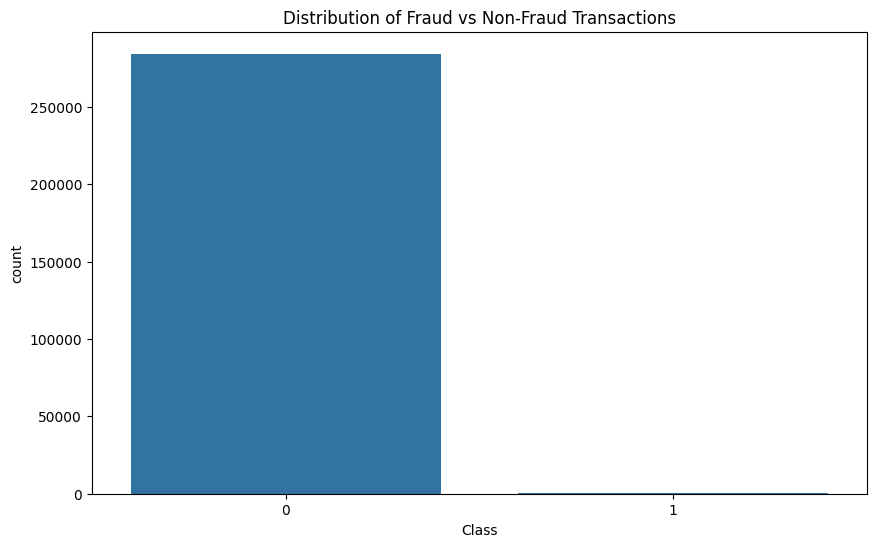

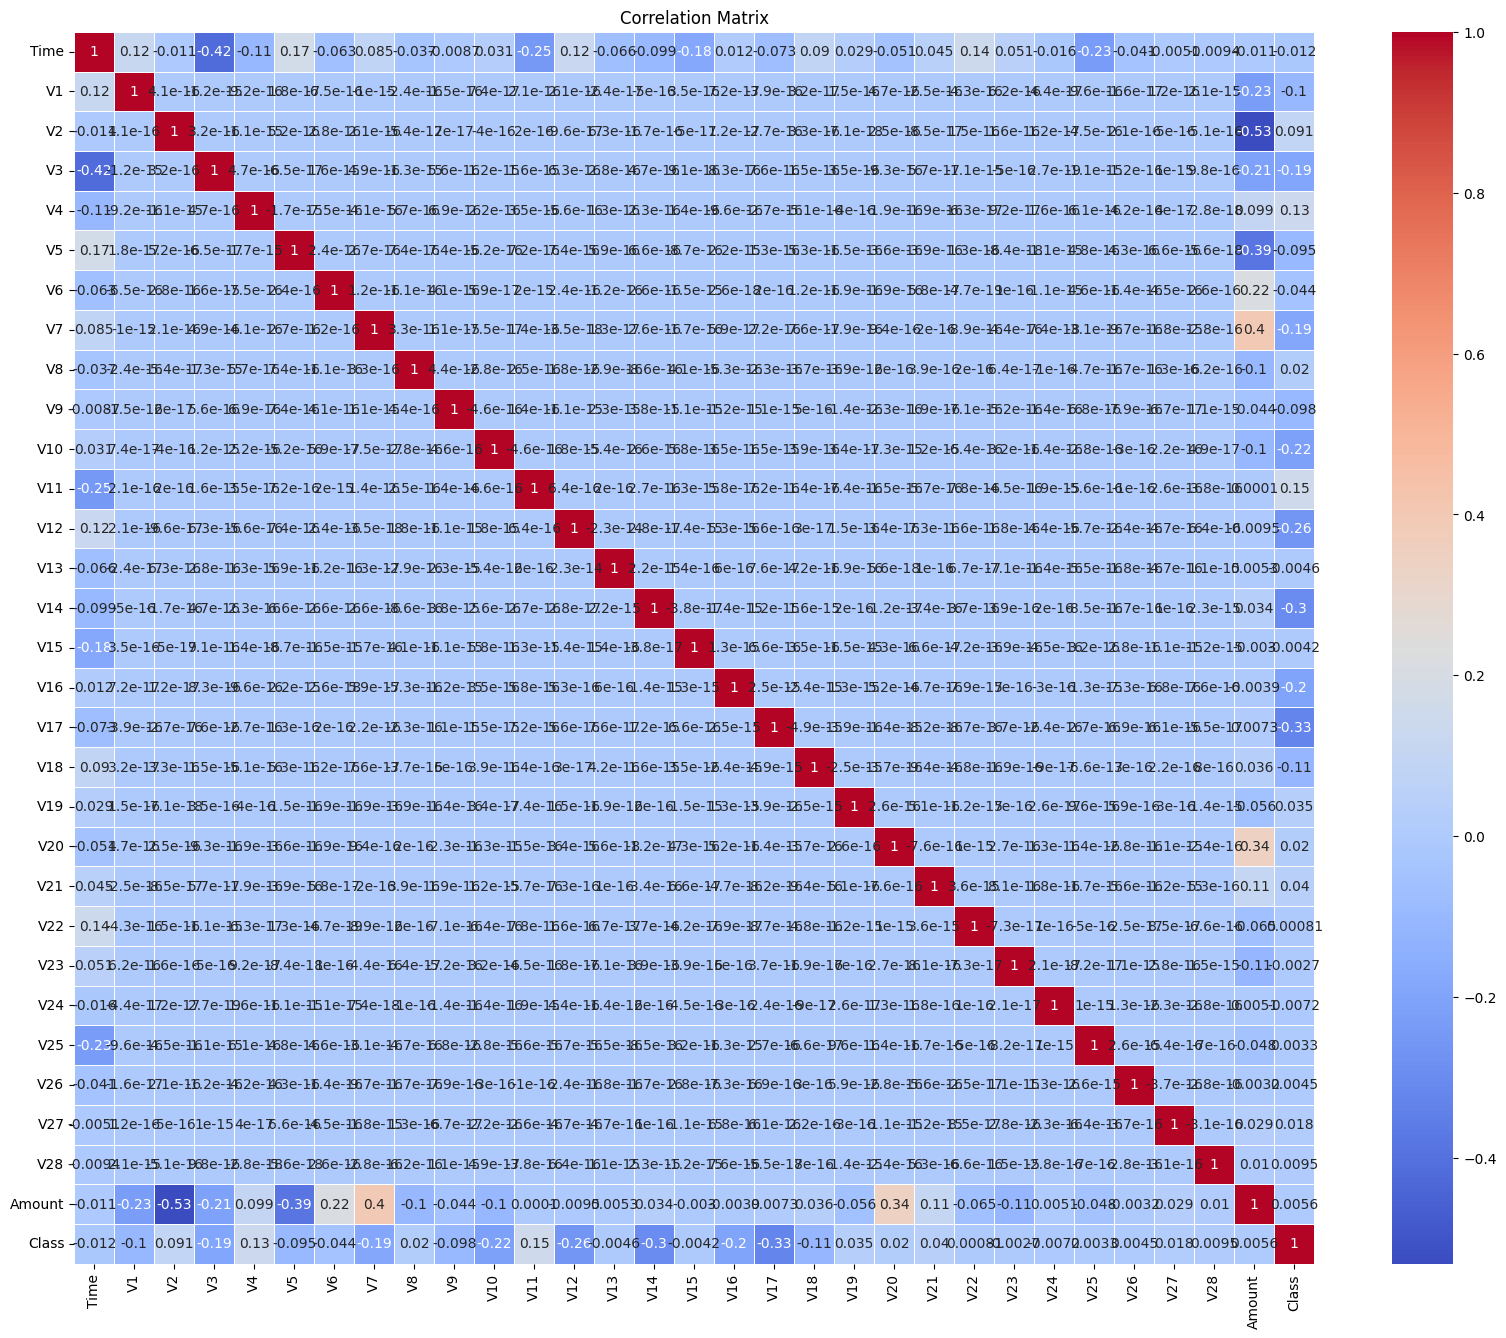

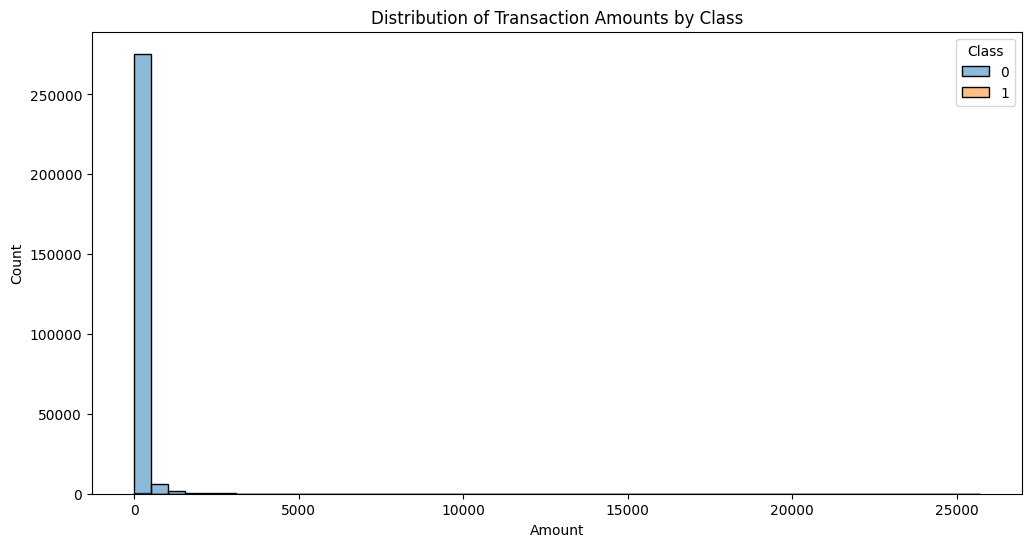


Class Distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [5]:
# Check class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

# Calculate correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of transaction amount
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50)
plt.title('Distribution of Transaction Amounts by Class')
plt.show()

# Print class distribution statistics
print("\nClass Distribution:")
print(df['Class'].value_counts(normalize=True))

# 3. Feature Engineering and Scaling

We'll prepare our data for the RNN model by scaling features and creating sequences.

In [6]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for RNN (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print("Training set shape:", X_train_reshaped.shape)
print("Testing set shape:", X_test_reshaped.shape)

Training set shape: (227845, 1, 30)
Testing set shape: (56962, 1, 30)


# 4. Neural Network Architecture

We'll create an RNN model with 6 hidden layers using different activation functions.

In [ ]:
# Create the RNN model
model = Sequential([
    # Input LSTM layer
    LSTM(128, input_shape=(1, X_train_scaled.shape[1]), return_sequences=True),
    Dropout(0.2),
    
    # Hidden layer 1 with ReLU
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    
    # Hidden layer 2 with tanh
    LSTM(32, activation='tanh', return_sequences=True),
    Dropout(0.2),
    
    # Hidden layer 3 with sigmoid
    LSTM(16, activation='sigmoid', return_sequences=True),
    Dropout(0.2),
    
    # Hidden layer 4 with PReLU
    LSTM(8, return_sequences=True),
    PReLU(),
    Dropout(0.2),
    
    # Hidden layer 5 with ELU
    LSTM(4, activation='elu', return_sequences=True),
    Dropout(0.2),
    
    # Hidden layer 6 with SELU
    LSTM(2, activation='selu', return_sequences=False),
    Dropout(0.2),
    
    # Output layer with sigmoid activation
    Dense(1, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        81,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 16)          │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 8)           │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 1, 8)           │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 1, 4)           │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 2)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,443 (575.95 KB)

 Trainable params: 147,443 (575.95 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Model Training and Validation

Let's train our model with early stopping to prevent overfitting.

Epoch 1/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9981 - loss: 0.1616 - val_accuracy: 0.9982 - val_loss: 0.0143
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9981 - loss: 0.1616 - val_accuracy: 0.9982 - val_loss: 0.0143
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9983 - loss: 0.0418 - val_accuracy: 0.9982 - val_loss: 0.0075
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9983 - loss: 0.0418 - val_accuracy: 0.9982 - val_loss: 0.0075
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9983 - loss: 0.0302 - val_accuracy: 0.9982 - val_loss: 0.0055
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9983 - loss: 0.0302 - val_accuracy: 0.9982 - val_loss: 0.0055
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9983 - loss: 0.0246 - val_accuracy: 0.9982 - val_loss: 0.0049
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9983 - loss: 0.0246 - va

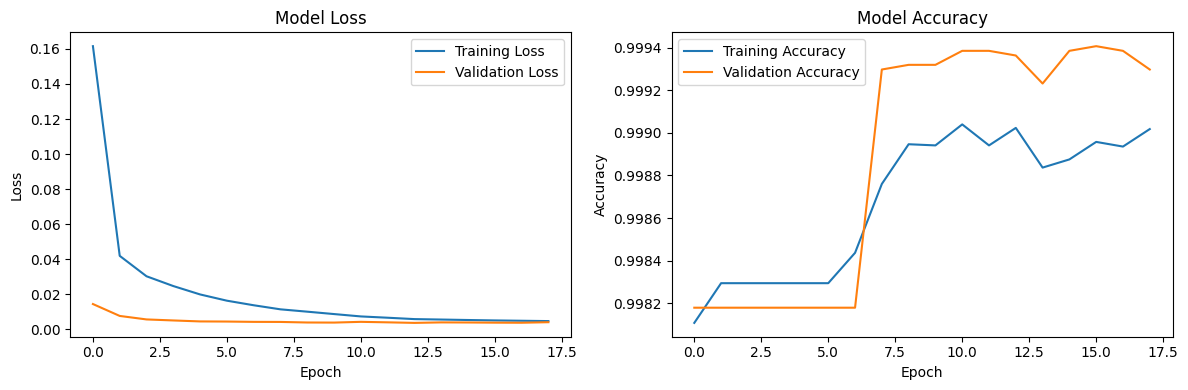

In [8]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Model Evaluation and Metrics

Let's evaluate our model's performance using various metrics.

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step


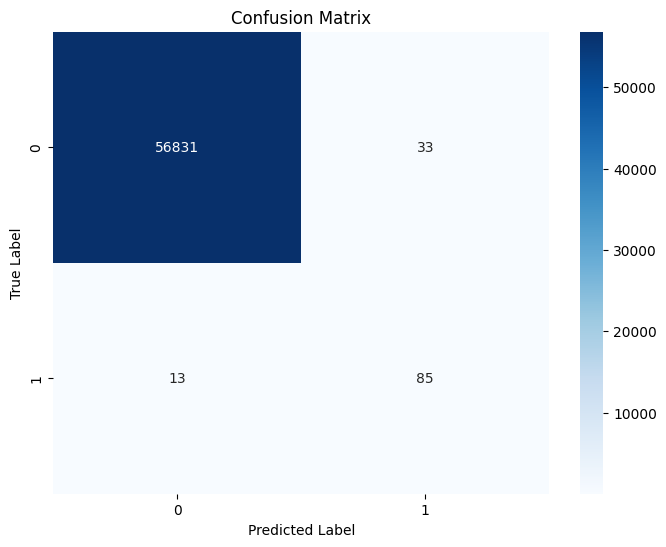


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.87      0.79        98

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962



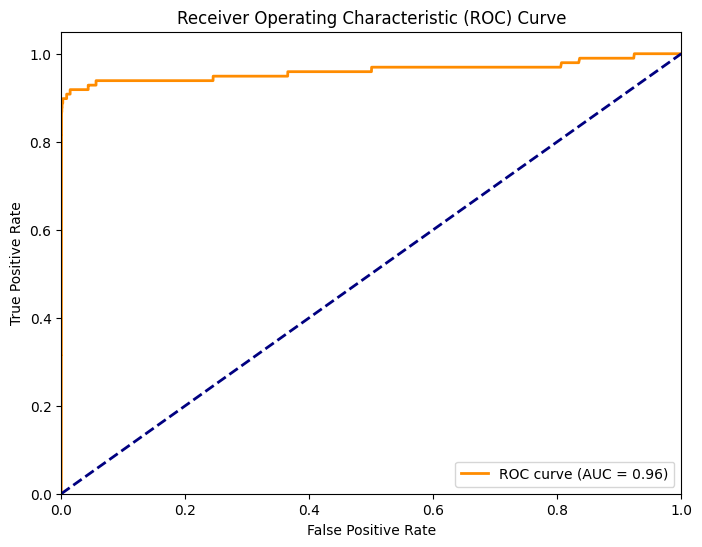

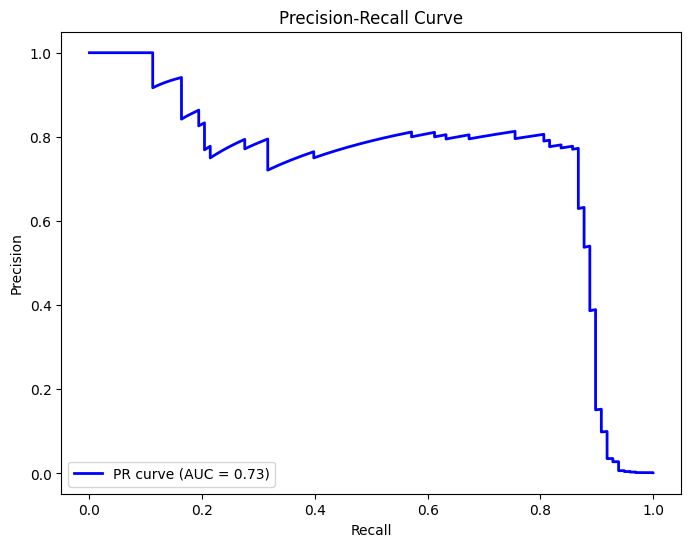

In [9]:
# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Calculate and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# 7. Save Model and Make Predictions

Let's save our trained model and demonstrate how to use it for predictions.

In [10]:
# Save the model
model.save('model/credit_card_fraud_model.h5')

# Save the scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")

# Example of how to load and use the model for predictions
def predict_fraud(transaction_data):
    # Load the saved model and scaler
    loaded_model = tf.keras.models.load_model('model/credit_card_fraud_model.h5')
    with open('model/scaler.pkl', 'rb') as f:
        loaded_scaler = pickle.load(f)
    
    # Scale the input data
    scaled_data = loaded_scaler.transform(transaction_data)
    
    # Reshape for RNN input
    reshaped_data = scaled_data.reshape((scaled_data.shape[0], 1, scaled_data.shape[1]))
    
    # Make prediction
    prediction = loaded_model.predict(reshaped_data)
    
    return prediction

# Example usage with sample data
sample_transaction = X_test.iloc[[0]]  # Take first transaction from test set
prediction = predict_fraud(sample_transaction)
print("\nSample Transaction Prediction:")
print(f"Probability of fraud: {prediction[0][0]:.4f}")
print(f"Actual class: {y_test.iloc[0]}")

Model and scaler saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Sample Transaction Prediction:
Probability of fraud: 0.0001
Actual class: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Sample Transaction Prediction:
Probability of fraud: 0.0001
Actual class: 0
